In [71]:
import sys
sys.path.append('../')
sys.dont_write_bytecode = True
import os
import numpy as np
import scipy
import scipy.ndimage
from matplotlib.pyplot import *
%matplotlib inline
import numba
sys.path.append('/Users/Michael_Saha/Repositories/')
sys.path.append('./../../../')
import fire_sim
from fire_sim import *

In [72]:
import gdal
#c = '/Users/Michael_Saha/DATA/FotF/classed1/classed1.tif'
fname = '/Users/Michael_Saha/DATA/FotF/classed/classed1.tif'
B = gdal.Open(fname).ReadAsArray()
B = scipy.misc.imresize(B, (np.array(B.shape)/10).astype(int) )

In [ ]:
Landscape()

In [73]:
B.shape, B.dtype
# Each fire is a list of pixels

((1059, 1223), dtype('uint8'))

In [75]:
import gdal
#c = '/Users/Michael_Saha/DATA/FotF/classed1/classed1.tif'
fname = '/Users/Michael_Saha/DATA/FotF/classed/classed1.tif'
B = gdal.Open(fname).ReadAsArray()
B = scipy.misc.imresize(B, (np.array(B.shape)/10).astype(int) )

L = np.zeros(shape=B.shape)

#     Bare  Grass Wood
L_distr = [
     [1.0,  0.0,  0.0],  # 0 - Water
     [0.1,  0.1,  0.8],  # 1 - Rando
     [0.6,  0.3,  0.1],  # 2 - Urban
     [0.2,  0.6,  0.2],  # 3 - General
     [0.7,  0.2,  0.1],  # 4 - Sandy? 
     [0.8,  0.1,  0.1],  # 5 - Urban
     [1.0,  0.0,  0.0],  # 6 - Shallow water
     [0.1,  0.1,  0.8],  # 7 - Rando
     [1.0,  0.0,  0.0]   # 8 - Out of area
    ]

fill_L(B, p, L)

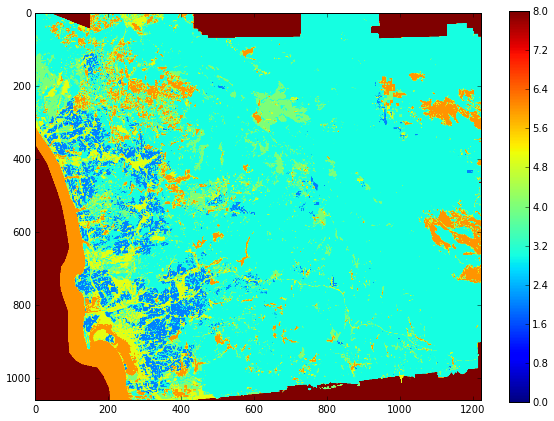

In [74]:
figure(figsize=(10,7))
imshow(B)
clim(0,8)
colorbar()

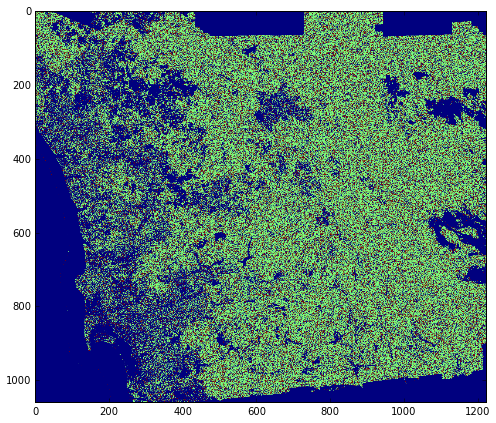

In [76]:
figure(figsize=(10,7))
imshow(L)

In [ ]:
sys.path.append('/Users/Michael_Saha/Repositories/blahb')
import blahb
import shapefile

shpfile = '/Users/Michael_Saha/DATA/FotF/burn_perims_new/fire_burn_hist_proj2.shp'
shpfile = 'F:/DATA/FotF/burn_perims_new/fire_burn_hist_proj2.shp'
sf = shapefile.Reader(shpfile)

fires = []
count = 0
for i in range(len(sf.shapes())):
    year = int(sf.record(i)[0])
    if year < 2000:
        continue
    shp = sf.shape(i)
    x, y = zip(*shp.points)
    x, y = (np.array(x)/10).astype(int), (np.array(y)/10).astype(int)
    fires.append(blahb.polygon2d(y, x, filled=True))